Test Phase4_3d file

In [1]:
# install anaconda: https://www.anaconda.com/products/individual
# if use Visual Studio Code, install python extension and select the python interpreter that includes anaconda
# install micropip: https://pypi.org/project/micropip/. You can also run anaconda prompt and type "pip install micropip"
import numpy as np
import micropip
await micropip.install("scipy")

In [2]:
from Phase4_trace_3d import Phase4_trace_3d
from generateTestPositions import generateTestPositions
# Cell 4
# Testing with dummy data

# Input conditions
initial_positions = [0, 0, 0]
noise = 1e-3
theta_degrees = 1.8
rev = 5  # revolutions of camera for the entire process
NOS = int(rev * 360 / theta_degrees)
NOS_per_section = 150  # must be larger than 5 to satisfy equations
camera_speed = 0.5  # in Hz or revolution per second
SRD = 1  # m, Source-Reference Distance
RDD = 1  # m, Reference-Detector (screen) Distance
radius = 1

method = 'acceleration'
dataPiling = 'serial'

# Auto-calculations of the rest of the parameters derived from the setting above
delta_T = camera_speed * theta_degrees / 360
shots_per_second = 1 / delta_T

# Define the velocity function
v = lambda t: [0.9 * np.sin(t), 0.9 * np.cos(t), 1]

# Pack conditions into a list
conditions = [noise, delta_T, NOS, theta_degrees, NOS_per_section, SRD, RDD,method,dataPiling]

# Generate test positions
xz_proj, real_positions = generateTestPositions(v, initial_positions, conditions)

In [3]:
# Print the first few rows of the generated data
print("xz_proj:")
print(xz_proj[:])
print("real_positions:")
print(real_positions[:])

xz_proj:
[[-3.59278431e-04 -6.81111681e-04]
 [ 1.44881370e-03  4.92036437e-03]
 [ 1.23066197e-03  9.28992066e-03]
 ...
 [ 1.84005992e+00  2.94284146e+00]
 [ 1.92578624e+00  3.03783684e+00]
 [ 2.01412510e+00  3.13919650e+00]]
real_positions:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.81249854e-06 2.24999766e-03 2.50000000e-03]
 [1.12499766e-05 4.49998125e-03 5.00000000e-03]
 ...
 [1.61696933e+00 5.44017450e-01 2.49250000e+00]
 [1.61832713e+00 5.42223328e-01 2.49500000e+00]
 [1.61968044e+00 5.40425818e-01 2.49750000e+00]]


In [4]:
# Import the function directly from the module
from Phase4_trace_3d import Phase4_trace_3d

# Then you can call it just by its name:
estimated_positions = Phase4_trace_3d(initial_positions, conditions, v, xz_proj)

NOS:  1000
NOS_per_Section:  150
prev 900
proj_index 850
last positions [[1.37387247 0.76585816 2.12644333]
 [1.37579178 0.76466084 2.12896316]
 [1.37770884 0.76345828 2.13148325]
 [1.37962364 0.76225048 2.1340036 ]
 [1.38153617 0.76103744 2.1365242 ]
 [1.38344645 0.75981915 2.13904505]
 [1.38535446 0.75859562 2.14156615]
 [1.38726021 0.75736685 2.14408751]
 [1.38916371 0.75613284 2.14660912]
 [1.39106494 0.75489359 2.14913099]
 [1.39296391 0.75364909 2.15165311]
 [1.39486063 0.75239935 2.15417549]
 [1.39675508 0.75114437 2.15669811]
 [1.39864727 0.74988415 2.159221  ]
 [1.4005372  0.74861868 2.16174413]
 [1.40242488 0.74734797 2.16426752]
 [1.40431029 0.74607202 2.16679116]
 [1.40619344 0.74479083 2.16931506]
 [1.40807433 0.7435044  2.17183921]
 [1.40995296 0.74221272 2.17436362]
 [1.41182933 0.7409158  2.17688828]
 [1.41370344 0.73961364 2.17941319]
 [1.41557529 0.73830624 2.18193835]
 [1.41744488 0.73699359 2.18446377]
 [1.41931221 0.7356757  2.18698945]
 [1.42117728 0.73435257 2.18

In [5]:
print('estimated positions: \n',estimated_positions)
print('real positions: \n',real_positions)

estimated positions: 
 [[ 1.80821883e-04 -5.49287351e-04 -6.85087915e-05]
 [ 1.75781398e-04  1.73308616e-03  2.43457804e-03]
 [ 1.76446531e-04  4.01439413e-03  4.93764332e-03]
 ...
 [ 1.61549906e+00  5.42351883e-01  2.49024868e+00]
 [ 1.61686485e+00  5.40503102e-01  2.49272322e+00]
 [ 1.61822686e+00  5.38649827e-01  2.49519759e+00]]
real positions: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.81249854e-06 2.24999766e-03 2.50000000e-03]
 [1.12499766e-05 4.49998125e-03 5.00000000e-03]
 ...
 [1.61696933e+00 5.44017450e-01 2.49250000e+00]
 [1.61832713e+00 5.42223328e-01 2.49500000e+00]
 [1.61968044e+00 5.40425818e-01 2.49750000e+00]]


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def Phase4Graph(real_positions, estimated_positions, conditions, v, f2):
    noise, delta_T, NOS, theta_degree, N, SRD, RDD, method, dataPiling = conditions
    
    # Ensure that real_positions and estimated_positions are the same length
    real_positions = real_positions[:len(estimated_positions)]
    
    fig = plt.figure(f2, figsize=(20, 16), dpi=100)
    
    ax1 = fig.add_subplot(111, projection='3d')
    
    ax1.plot(real_positions[:, 0], real_positions[:, 1], real_positions[:, 2], 'r', markersize=10)
    ax1.plot(estimated_positions[:, 0], estimated_positions[:, 1], estimated_positions[:, 2], 'b', linewidth=2)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Real Positions vs Estimated Positions in 3D')
    ax1.legend(['Real Positions', 'Estimated Positions'])
    
    distances = np.linalg.norm(real_positions - estimated_positions, axis=1)
    min_val, min_idx = np.min(distances), np.argmin(distances)
    max_val, max_idx = np.max(distances), np.argmax(distances)
    
    ax1.text(*real_positions[min_idx], f'Min ({min_idx}): {real_positions[min_idx]}', color='r')
    ax1.text(*estimated_positions[min_idx], f'Min ({min_idx}): {estimated_positions[min_idx]}', color='b')
    ax1.text(*real_positions[max_idx], f'Max ({max_idx}): {real_positions[max_idx]}', color='r')
    ax1.text(*estimated_positions[max_idx], f'Max ({max_idx}): {estimated_positions[max_idx]}', color='b')
    
    print(f'Noise: {noise}\nMin Distance: {min_val}\nMax Distance: {max_val}\nNumber of Shots: {NOS}\nRotation: {theta_degree}\nTime Between Shots: {delta_T}\nNOS Per Section: {N}\nMethod: {method}\nData Piling: {dataPiling}')
    
    v_str = str(v).replace('<function ', '').replace(' at 0x' + hex(id(v))[2:] + '>', '')
    
    print(f'True velocity:\n{v_str}\nt is time elapsed')
    
    plt.show()


Noise: 0.001
Min Distance: 8.183481882571363e-06
Max Distance: 0.0033399122715433533
Number of Shots: 1000
Rotation: 1.8
Time Between Shots: 0.0025
NOS Per Section: 150
Method: acceleration
Data Piling: serial
True velocity:
<lambda> at 0x000002BE308B4220>
t is time elapsed


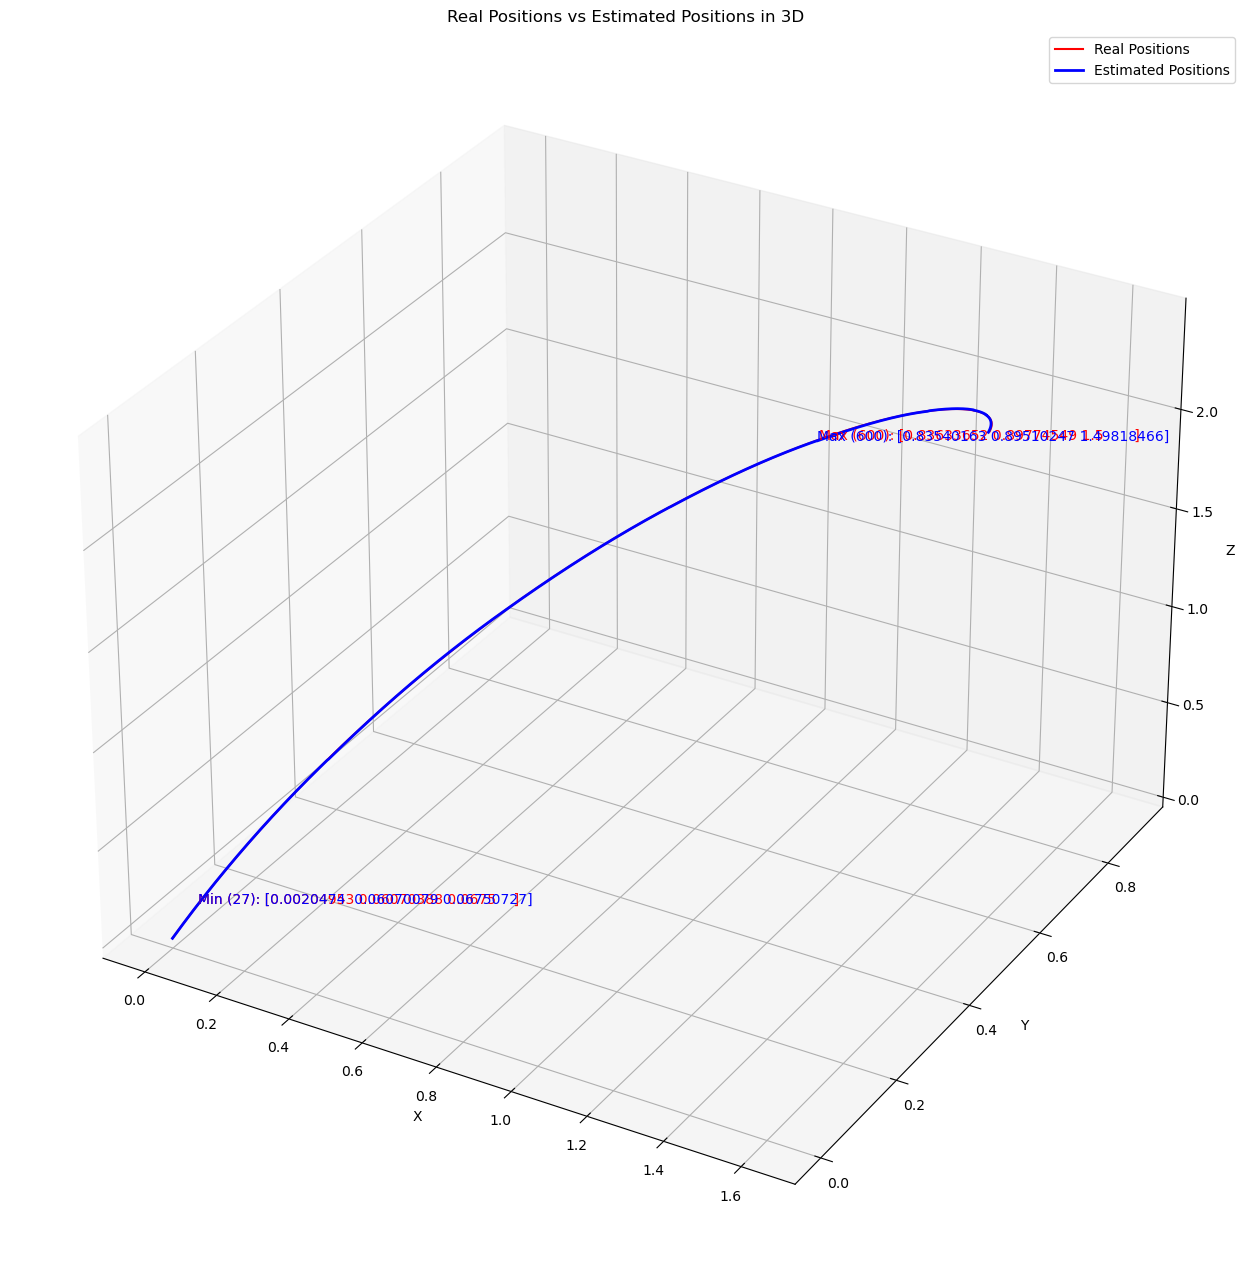

In [7]:
f2 = 0
Phase4Graph(real_positions, estimated_positions, conditions, v, f2)